<a href="https://colab.research.google.com/github/tanyakuznetsova/Music_Mental_Health/blob/main/Cluster_Analysis_Music_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
!pip install kneed -q
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import mpl_toolkits.mplot3d
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.neighbors import KernelDensity

In [29]:
data = pd.read_csv('https://bitbucket.org/silverxlibra/music-mental-health/downloads/mxmh_survey_results.csv')

In [30]:
data.shape

(736, 33)

In [31]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Cluster Analysis: Listener's Segmentation and Exploration of Patterns Present in the Data

By performing thorough cluster analysis, we can uncover further trends and reveal coherent patterns present in the data. Clustering splits the dataset into representative segments by key characteristics; in this case, it allows us to group the participating listeners.

# Dimensionality Reduction

Each listener is represented by a 29-dimensional vector. Let's reduce this dimensionality to something that more human-interpretable and visualizable.



In [32]:
clean_data = data.dropna()
clean_data = clean_data.drop(columns=['Timestamp', 'Composer','BPM','Permissions'])
encoder = LabelEncoder()
encoded_datav2 = pd.DataFrame()

for column in clean_data:
    if clean_data[column].dtype == 'object':
        encoded_datav2[column] = encoder.fit_transform(clean_data[column])
    else:
        encoded_datav2[column] = clean_data[column]

encoded_datav2.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4,4.0,0,0,15,0,1,0,0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,5,2.5,1,0,6,1,1,2,0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4,4.0,1,0,12,1,0,0,0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,6,1,1,1,2,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,15,1,1,2,0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0


In [33]:
encoded_datav2.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Fav genre', 'Exploratory', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects'],
      dtype='object')

In [34]:
features = ['Age', 'Hours per day',
            'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
            'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
            'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
            'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
            'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
            'Frequency [Video game music]',
            'Anxiety', 'Depression', 'Insomnia',
            'OCD', 'Music effects']

select_data = encoded_datav2[features]

In [35]:
select_data['Frequency [Classical]'].unique()

array([0, 2, 1, 3])

In [36]:
scaler = MinMaxScaler()

X = scaler.fit_transform(select_data)

In [37]:
X[0]

array([0.10126582, 0.16666667, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.33333333, 0.33333333, 1.        ,
       0.        , 0.66666667, 0.66666667, 0.33333333, 0.        ,
       0.33333333, 0.33333333, 1.        , 0.7       , 0.7       ,
       1.        , 0.2       , 0.5       ])

In [38]:
pca_ = PCA()
pca_.fit(X)

PCA()

In [39]:
pca_.explained_variance_ratio_

array([0.17456666, 0.11672815, 0.08180197, 0.07769763, 0.06758116,
       0.05313694, 0.04435128, 0.04384576, 0.03784717, 0.03381064,
       0.03213799, 0.03110029, 0.02889519, 0.02747199, 0.02617234,
       0.02453376, 0.02217336, 0.01952486, 0.01792606, 0.01402772,
       0.01124833, 0.00697121, 0.00644952])

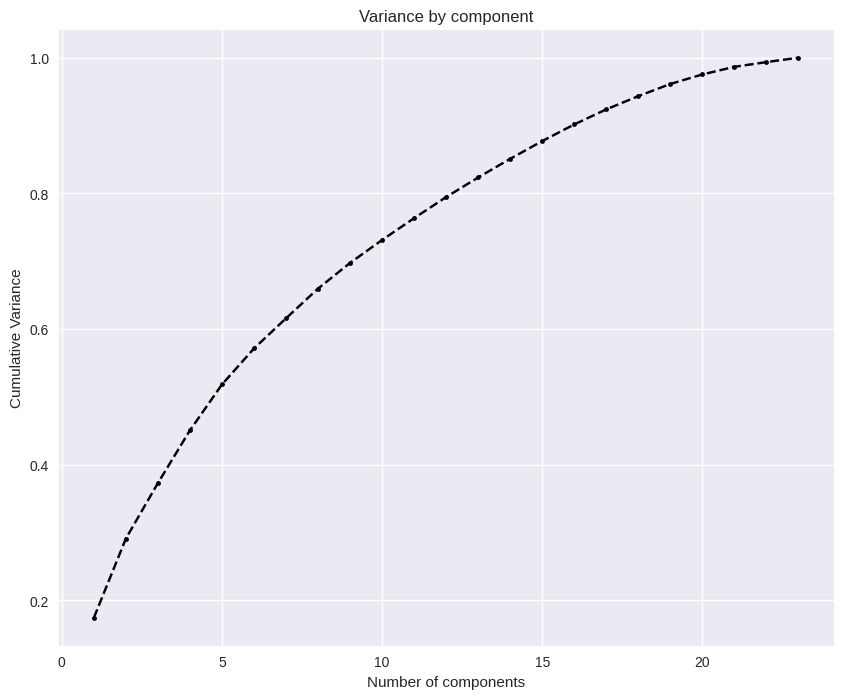

In [40]:
plt.figure(figsize = (10, 8))
plt.style.use('seaborn-v0_8')
plt.plot(range(1, select_data.shape[1]+1),
         pca_.explained_variance_ratio_.cumsum(),
         marker = ".",
         linestyle = '--',
         c = 'black')

plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Variance by component')
plt.show()

This graph suggests that 80% of the variance can be explained by 12 features.

In [41]:
pca = PCA(n_components = 12)
reduced_data = pca.fit_transform(X)

print(type(reduced_data))

<class 'numpy.ndarray'>


In [42]:
within_clusters_sum_of_squares = []

#let's explore up to 15 clusters
for i in range(1, 16):
  kmeans_pca = KMeans(n_clusters = i,
                      init = 'k-means++',
                      n_init = 'auto',
                      random_state = 42)
  kmeans_pca.fit(reduced_data)
  within_clusters_sum_of_squares.append(kmeans_pca.inertia_)

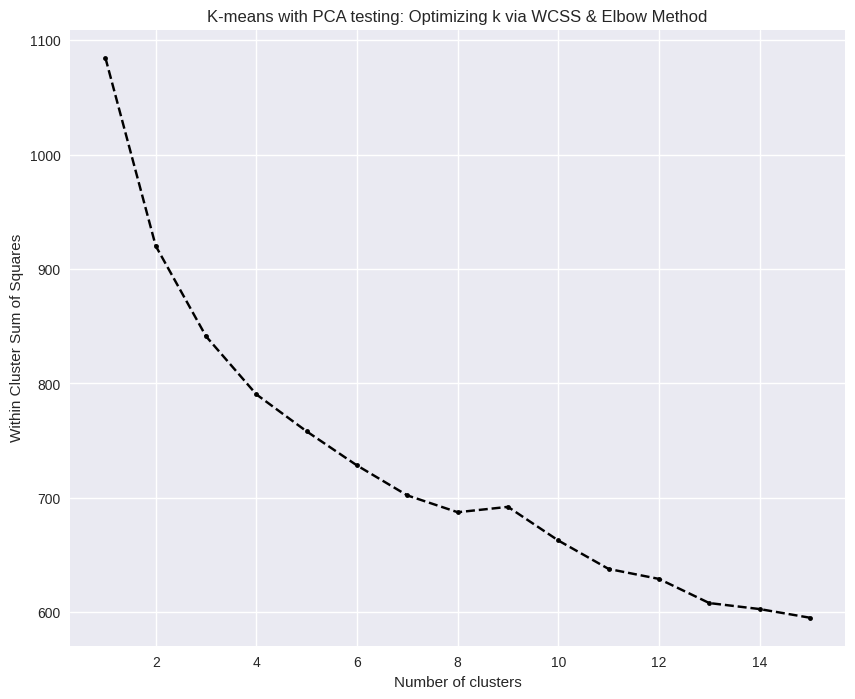

In [43]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 16),
         within_clusters_sum_of_squares,
         marker = ".",
         linestyle = '--',
         c = 'black')

plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('K-means with PCA testing: Optimizing k via WCSS & Elbow Method')
plt.show()

In [44]:
kl = KneeLocator(range(1, 16), within_clusters_sum_of_squares,
                 curve="convex", direction="decreasing")
print(f'The suggested num of clusters is {kl.elbow}')

The suggested num of clusters is 4


Using the elbow method, we can see that the law of diminishing returns kicks in at about 4 clusters, which suggests that this would be a good number to aim for.

In [45]:
n_clusters = kl.elbow
kmeans = KMeans(n_clusters = n_clusters,
                random_state = 42,
                init='k-means++',
                n_init = 'auto')

In [46]:
kmeans.fit(reduced_data)

KMeans(n_clusters=4, n_init='auto', random_state=42)

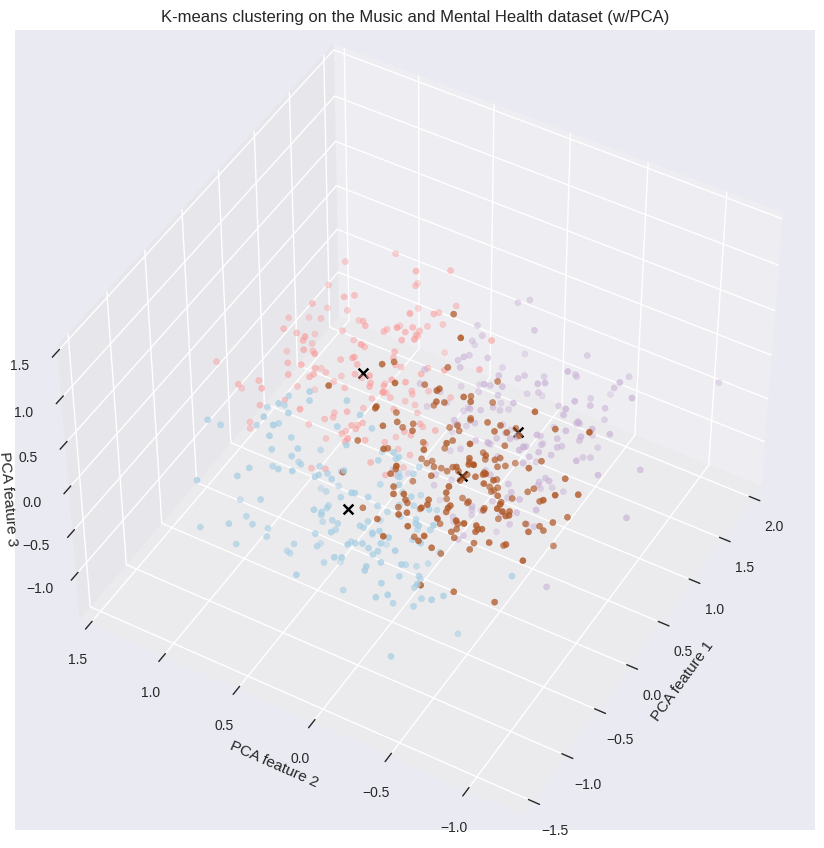

In [47]:
fig = plt.figure(1, figsize=(10, 8))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=45, azim=-150)
ax.set_position([0, 0, 0.95, 1])

ax.scatter(reduced_data[:, 0],
           reduced_data[:, 1],
           reduced_data[:, 2],
           c = kmeans.labels_,
           cmap = 'Paired'
           )
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.title('K-means clustering on the Music and Mental Health dataset (w/PCA)')

#colors = ['royalblue', 'pink', 'purple','brown']
for i, coor in enumerate(kmeans.cluster_centers_):
    ax.scatter(coor[0], coor[1], coor[2], s=50,
               #c = colors[i],
               c = 'black',
               marker='x')

plt.show()

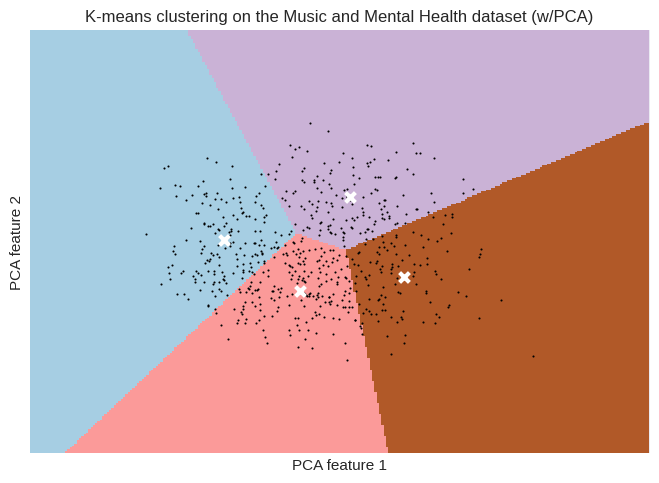

In [48]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++",
                n_clusters=n_clusters,
                random_state=42,
                n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=3)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=50,
    linewidths=3,
    color="white",
    zorder=10,
)

plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.title(
    "K-means clustering on the Music and Mental Health dataset (w/PCA)"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Evaluation with the Silhouette Score
The silhouette score is a metric used in clustering algorithms to measure how well-separated clusters are.

In [49]:
cluster_labels = kmeans.fit_predict(reduced_data)
silhouette_avg = silhouette_score(reduced_data, cluster_labels)

print(f'For {n_clusters} n-clusters, the average silhouette score is {silhouette_avg}')

For 4 n-clusters, the average silhouette score is 0.3594667337409679


The results are ambiguous: **the score of ≈0.36** suggests that there is **moderate separation** between clusters and that they are reasonably well-defined but still have some overlap and ambiguity.  

The data, when visualized, is fairly uniform, which tells us that the inherent patters in it might be somewhat subtle and the data may not naturally lend itself to distinct clusters.

It is reasonable to expect some degree of overlap in clusters when analyzing data related to music tastes and mental health conditions, being highly individual. Furthermore, we can expext the relationship between music tastes and mental health to be complex and multifaceted, and this relationship may not be deterministic.

The score of 1.03 is still informative, although by no means definitive and requires a careful qualitative analysis.

In [50]:
clustered_data = pd.DataFrame(select_data, columns=select_data.columns)
clustered_data['Cluster'] = kmeans.labels_+1


clustered_data.head()

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Cluster
2,18.0,4.0,0,0,3,0,0,1,1,3,...,0,1,1,3,7.0,7.0,10.0,2.0,1,2
3,61.0,2.5,2,0,0,1,2,0,3,2,...,2,0,0,0,9.0,7.0,3.0,3.0,0,3
4,18.0,4.0,0,0,1,0,1,3,0,3,...,3,3,0,1,7.0,2.0,5.0,9.0,0,3
5,18.0,5.0,1,2,0,0,0,2,3,3,...,3,3,3,0,8.0,8.0,7.0,7.0,0,4
6,18.0,3.0,2,0,1,2,1,1,2,0,...,1,0,0,2,4.0,8.0,6.0,0.0,0,1


# Qualitative Analysis and Descriptive Statistics

Taking a closer manual look at the segments with some visualizations and statistics.

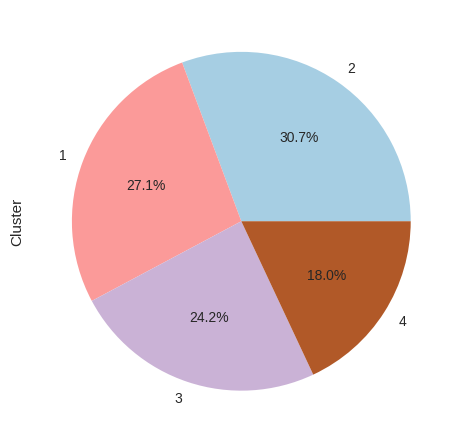

In [51]:
clustered_data['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',
                                              cmap = 'Paired'
                                              )
plt.show()

In [52]:
def cluster_descriptive_statistics(clustered_data):
    #group the data by cluster
    grouped_data = clustered_data.groupby('Cluster')

    #compute descriptive statistics for each cluster
    cluster_statistics = grouped_data.describe(include = 'all')

    return cluster_statistics

In [53]:
cluster_statistics = cluster_descriptive_statistics(clustered_data)
cluster_statistics.head(3)

Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Cluster                                                              
1        167.0  28.550898  14.995445  12.0  18.0  22.0  33.5  80.0   
2        189.0  23.518519   8.343422  13.0  18.0  21.0  26.0  64.0   
3        149.0  22.825503  11.754086  10.0  17.0  19.0  22.0  89.0   

        Hours per day            ...  OCD       Music effects            \
                count      mean  ...  75%   max         count      mean   
Cluster                          ...                                      
1               167.0  2.857485  ...  4.0  10.0         167.0  0.383234   
2               189.0  3.865079  ...  4.0  10.0         189.0  0.264550   
3               149.0  3.701342  ...  4.0  10.0         149.0  0.201342   

                                            
              std  min  25%  50%  75%  max  
Cluster                                     
1        0.567562  0.0  0.0  0.0  1.0  2.0  
2        0.488008  0.0  0.0  0.0  0.0  2.0  
3        0.434646  0.0  0.0  0.0  0.0  2.0  

[3 rows x 184 columns]

In [54]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)
#cluster 1
cluster_statistics.iloc[0]

Age                           count    167.000000
                              mean      28.550898
                              std       14.995445
                              min       12.000000
                              25%       18.000000
                              50%       22.000000
                              75%       33.500000
                              max       80.000000
Hours per day                 count    167.000000
                              mean       2.857485
                              std        2.856005
                              min        0.000000
                              25%        1.000000
                              50%        2.000000
                              75%        4.000000
                              max       24.000000
Frequency [Classical]         count    167.000000
                              mean       1.371257
                              std        1.105795
                              min        0.000000


**Cluster 1 inference:**

* average age is **28**
* number of hours of listening to music per day ≈ **2.85**
* preferred genres are **rock, pop, classical, and metal**
* most often occurring mental health conditions are **moderate anxiety**, low on all other fronts.

In [55]:
cluster_statistics.iloc[1] #second cluster

Age                           count    189.000000
                              mean      23.518519
                              std        8.343422
                              min       13.000000
                              25%       18.000000
                              50%       21.000000
                              75%       26.000000
                              max       64.000000
Hours per day                 count    189.000000
                              mean       3.865079
                              std        2.745702
                              min        0.500000
                              25%        2.000000
                              50%        3.000000
                              75%        5.000000
                              max       15.000000
Frequency [Classical]         count    189.000000
                              mean       1.269841
                              std        0.890966
                              min        0.000000


**Cluster 2 inference:**

*   average age is **23**, fairly young demographic
*   listen to music ≈ **3.86** hrs per day
*   favorite genres are **rock, metal, pop** and **video game music**.
*   almost never listen to Latin, gospel, or k-pop.
*   they report moderate to considerable **anxiety and depression**

In [56]:
cluster_statistics.iloc[2] #third cluster

Age                           count    149.000000
                              mean      22.825503
                              std       11.754086
                              min       10.000000
                              25%       17.000000
                              50%       19.000000
                              75%       22.000000
                              max       89.000000
Hours per day                 count    149.000000
                              mean       3.701342
                              std        3.354565
                              min        0.500000
                              25%        2.000000
                              50%        3.000000
                              75%        5.000000
                              max       24.000000
Frequency [Classical]         count    149.000000
                              mean       1.161074
                              std        0.993677
                              min        0.000000


**Cluster 3 inference:**

*   average age is **22**
*   **average** overall time of listening to music per day at **3.7** hrs a day
*   favor the most popular overall genres such as **pop** and **hip hop, r&b, and rap**.
*   **moderate anxiety** and low levels of all other conditions

In [57]:
cluster_statistics.iloc[3] #fourth cluster

Age                           count    111.000000
                              mean      23.945946
                              std        9.247936
                              min       14.000000
                              25%       18.000000
                              50%       21.000000
                              75%       26.000000
                              max       73.000000
Hours per day                 count    111.000000
                              mean       4.698198
                              std        3.208851
                              min        0.500000
                              25%        3.000000
                              50%        4.000000
                              75%        6.000000
                              max       18.000000
Frequency [Classical]         count    111.000000
                              mean       1.576577
                              std        0.826268
                              min        0.000000


**Cluster 4 inference:**

*   average age is **.5**
*   **higher** than overall average time of listening to music per day at almost **5** hrs a day
*   favor genres such as **pop, rock, r&b, rap** and **hip hop**
*   **severe anxiety** and **depression** levels paired with **mild to moderate insomnia** and **OCD**.

This group is by far **the most affected** by various mental health conditions and they also **consume music at a higher rate** than others.


In [58]:
#cluster_statistics.iloc[4] #fifth cluster

**Cluster 5 inference:**

* similar average age as cluster 4, **22**
* also **slightly higher** than overall average rate of listening to music per day at **4** hrs
* this group is notably into such genres as **rock and metal**
* **moderate to high levels of anxiety** and **depression** and, notably, **insomnia**, which is visible in the parallel plots (but *not* OCD)

## Visualizations and Further Interpetations of Clustering

Let's calculate the overall Mental Health Severity Score based on the four reported mental health conditions.

With this new engineered feature, we can compare how the clusters differ from each other when fitted with a trend line for the overall mental health score.

In [59]:
clustered_data['MH Score'] = np.mean(clustered_data.iloc[:, 18:22], axis=1)
clustered_data.head()

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Cluster,MH Score
2,18.0,4.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,1,2,6.50
3,61.0,2.5,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,0,3,5.50
4,18.0,4.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,0,3,5.75
5,18.0,5.0,1,2,0,0,0,2,3,3,1,3,1,3,3,3,3,0,8.0,8.0,7.0,7.0,0,4,7.50
6,18.0,3.0,2,0,1,2,1,1,2,0,1,1,1,1,1,0,0,2,4.0,8.0,6.0,0.0,0,1,4.50


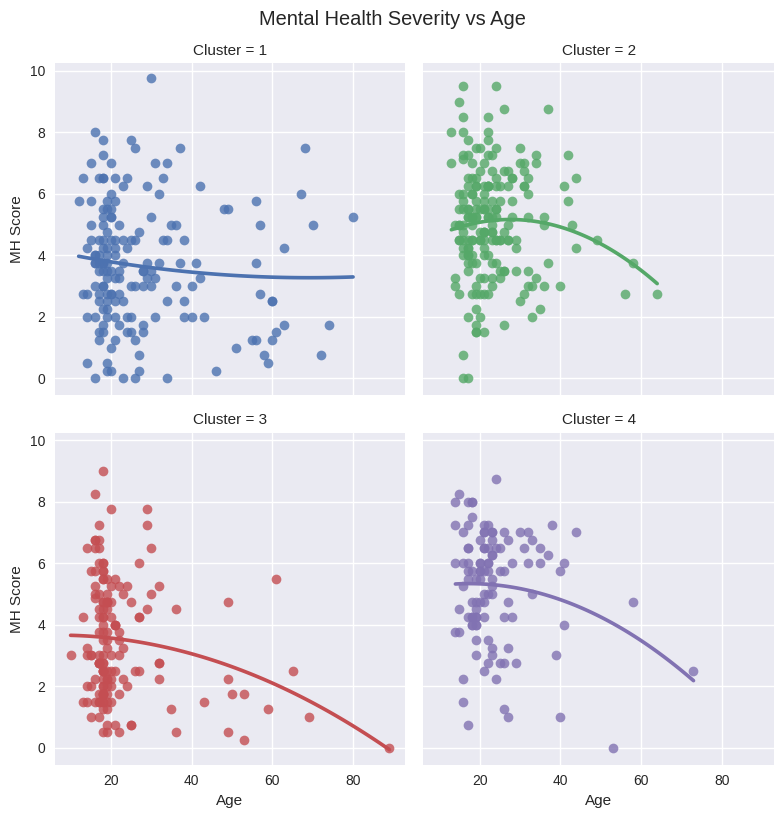

In [98]:
plt.style.use('seaborn-v0_8')

#scatter plot for each cluster with regression line
grid = sns.lmplot(x="Age", y="MH Score",
                  data=clustered_data,
                  hue='Cluster',
                  col_wrap=2, #creates grid
                  col='Cluster', # (un)comment for individual cluster plots
                  order = 2, #polynomial trend line, comment out for linear
                  ci=None, aspect=1,
                  height=4)

grid.fig.suptitle('Mental Health Severity vs Age', y=1.02)

plt.show()

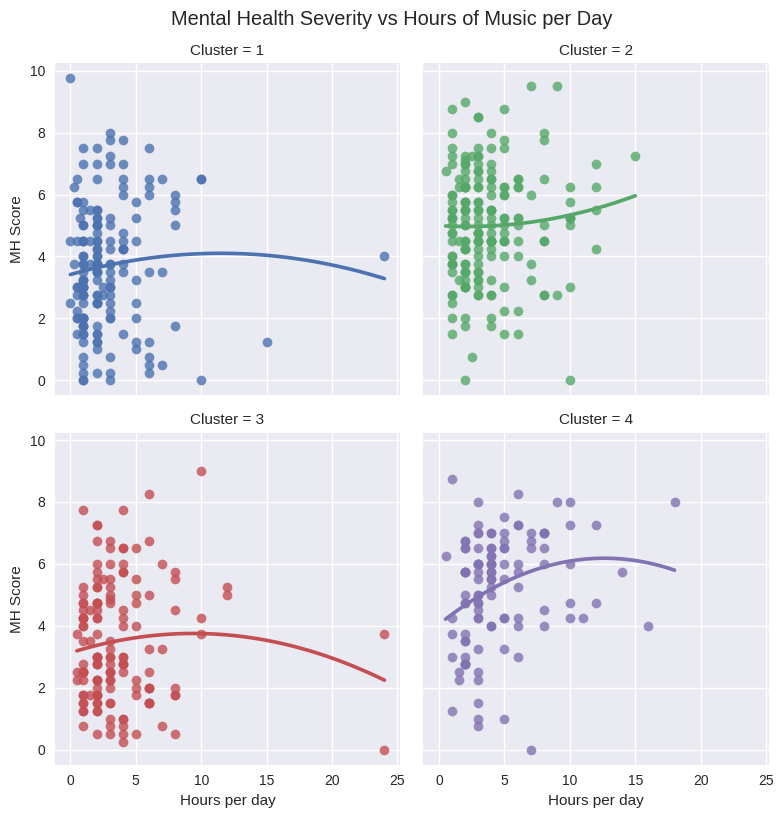

In [101]:
grid_2 = sns.lmplot(x="Hours per day",
                    y="MH Score",
                    data=clustered_data,
                    hue='Cluster',
                    col_wrap=2,
                    col='Cluster', # (un)comment for individual cluster plots
                    order = 2,  #polynomial trend line, comment out for linear
                    ci=None, aspect=1,
                    height=4)

grid_2.fig.suptitle('Mental Health Severity vs Hours of Music per Day', y=1.02)
plt.show()

## Inference

The plots above investigate the relationship between the mental health and the two prominent features: age and hours of music per day.

**Age and Mental Health Findings**

Age is positively correlated with less severe mental health conditions across all clusters.

**Hours of Music a Day and Mental Health Findings**

There is a mixed picture regarding the relationship between how much participants listen to music and their mental health score.

Here, clusters 1, 3, and 4 all experience a slight increase around 10 hours of music per day, then a dip towards the more extreme side of the spectrum for those listeners who have music on around the clock. For our typical users, the results suggest that listening to music for more than 3-4 hours a day actually leads to a worse state of mental health. For cluster 2, which is our rock, metal and video music lovers, the trend is undeniable: listening to music for longer than five hours leads to a worse mental health overall. Therefore, it is generally not advised to listen to music for too long.

It seems to be different for our extreme users who have music on 24 hours a day, but there are few data points like this and the results should be viewed as tentative at best.


# Agglomerative Clustering

Attempts to form clusters hieararchically and visualize them with a dendrogram.

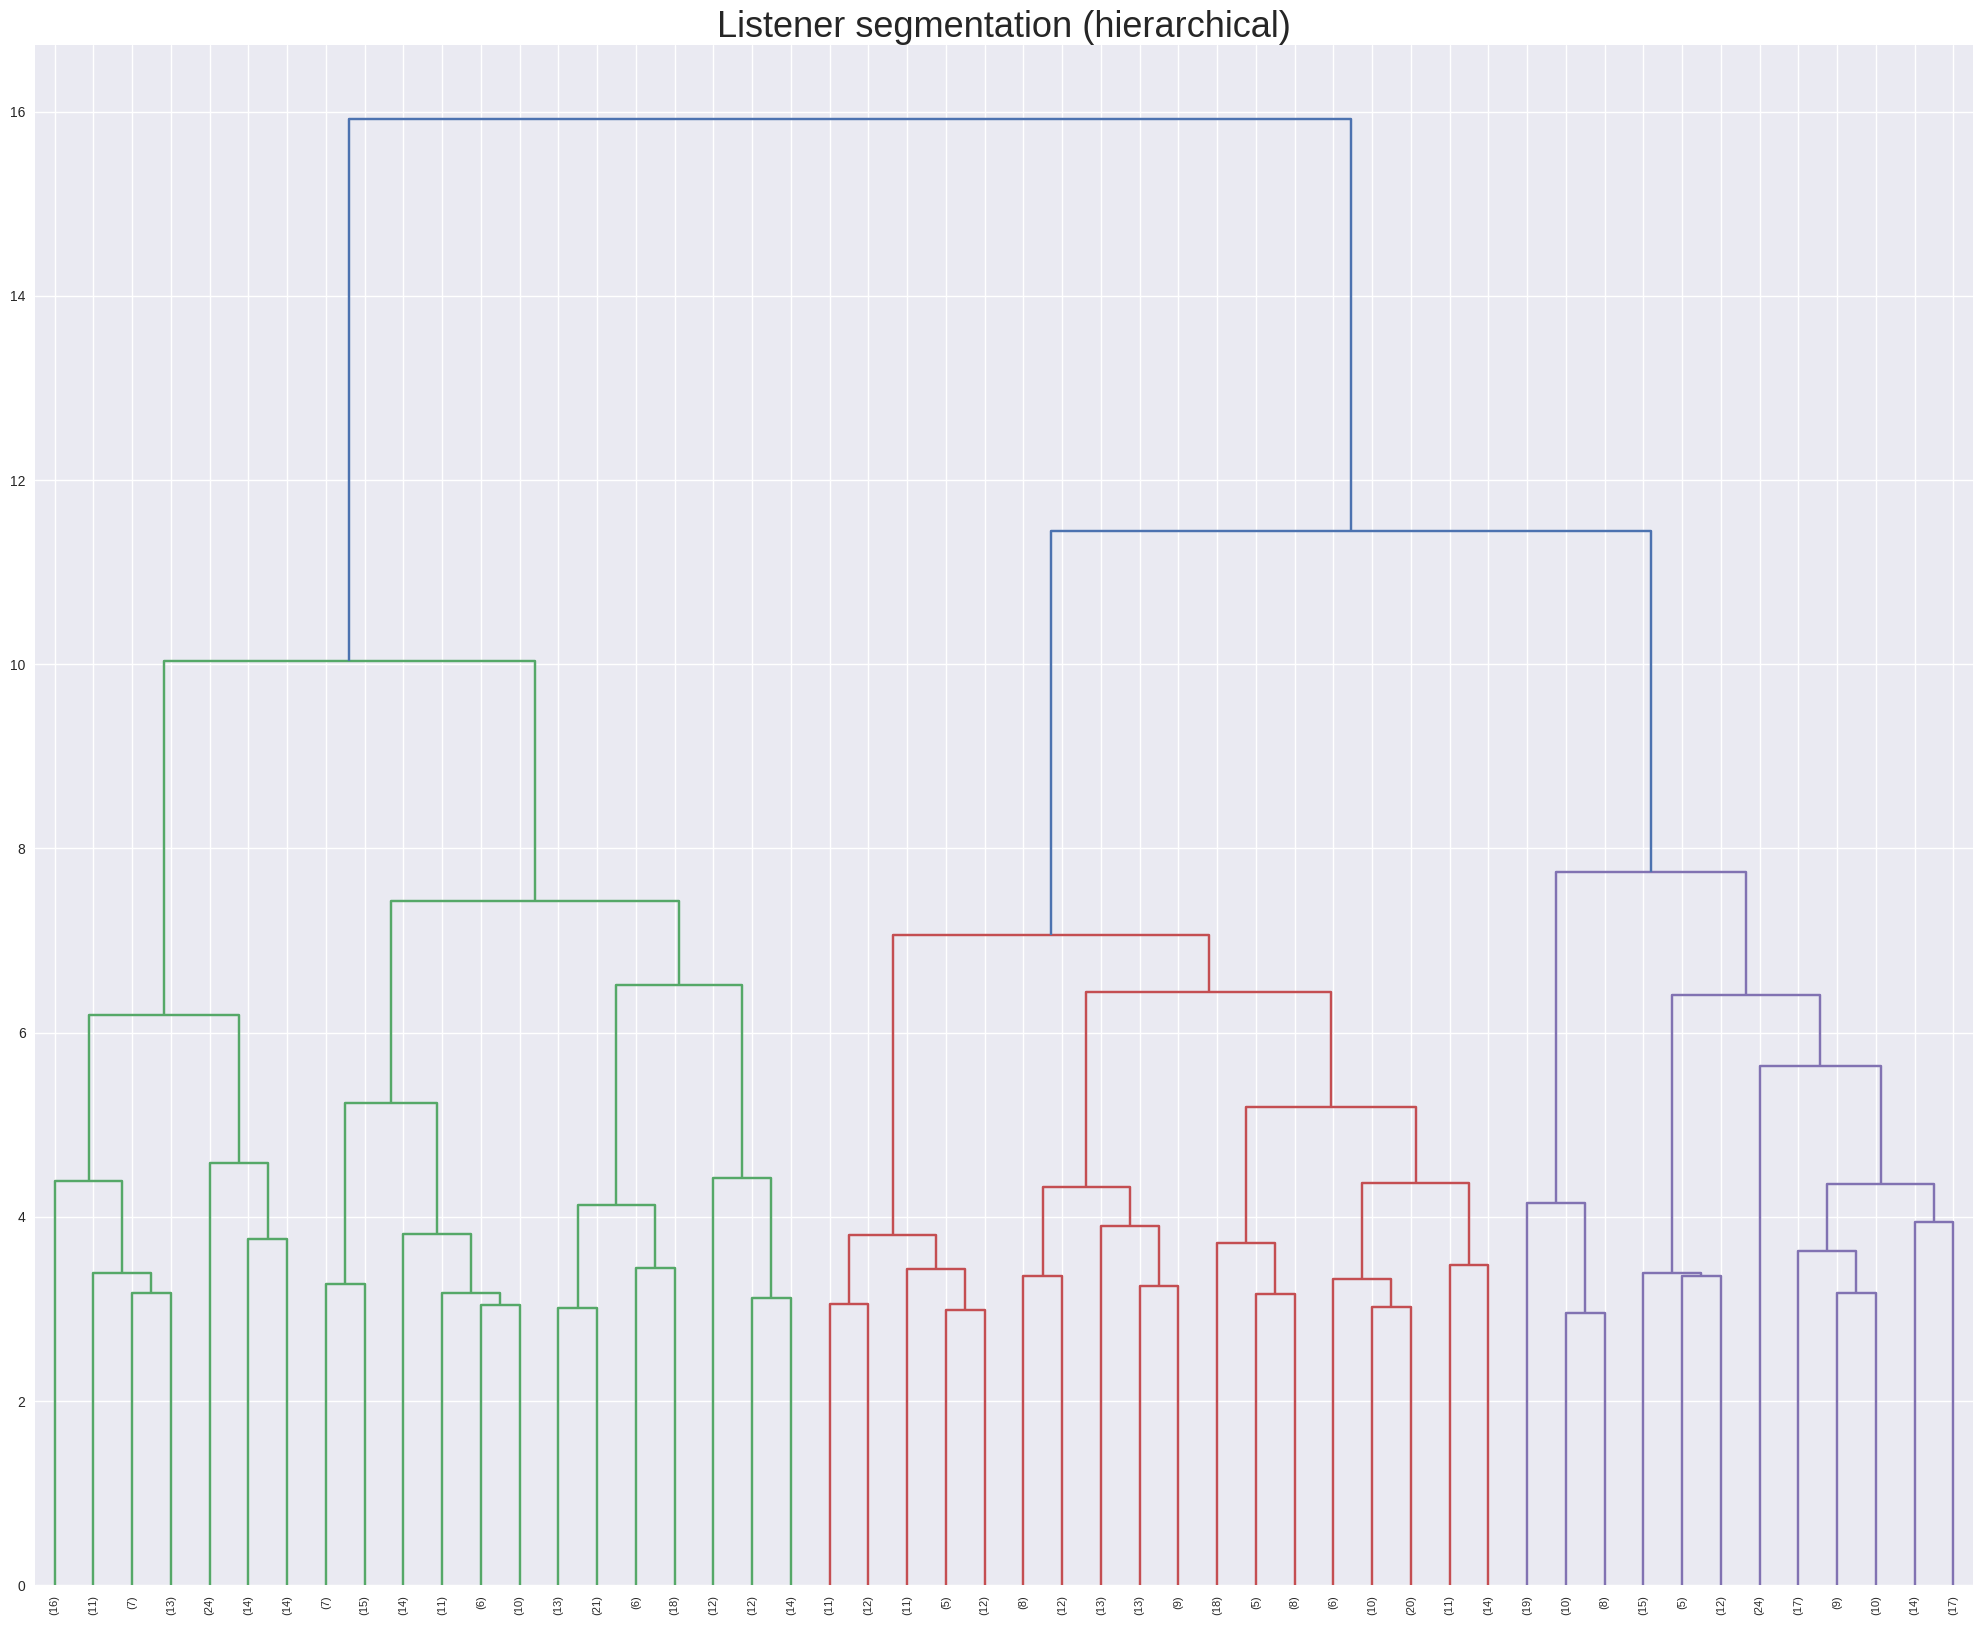

In [105]:
linkage_result = linkage(X, method = 'ward')


plt.figure(figsize = (25, 20))
dendrogram(linkage_result, truncate_mode = 'lastp', p = 50
           )
plt.title('Listener segmentation (hierarchical)', fontsize=26)

plt.show()

In [63]:
cluster_assignments = fcluster(linkage_result, t = 3, criterion='maxclust') #t is set to 3, the max number of clusters

In [64]:
print(cluster_assignments)

[2 1 1 1 3 1 3 1 1 3 3 1 2 2 1 1 2 1 3 2 1 1 1 3 3 3 1 3 1 1 3 1 1 2 3 1 2
 3 3 2 2 1 3 1 2 1 2 3 1 1 1 3 2 2 2 2 3 1 3 2 1 1 1 1 3 1 2 1 2 1 2 1 1 3
 3 1 1 3 2 2 3 3 2 1 2 3 2 2 3 2 2 2 2 1 2 2 3 1 2 2 1 1 3 2 1 3 2 2 2 2 2
 2 2 2 2 3 2 2 1 2 2 3 1 1 1 2 1 2 3 1 3 1 2 1 1 2 2 2 1 2 1 2 2 1 3 3 2 2
 3 2 1 3 1 1 1 1 3 1 3 2 1 1 2 2 1 2 2 2 2 3 2 3 1 1 1 3 2 1 1 2 1 1 2 3 1
 1 2 1 2 2 3 2 3 1 3 3 2 1 3 1 1 2 3 1 1 3 3 2 2 2 1 1 2 3 3 2 1 2 2 3 1 3
 1 3 3 3 2 2 2 2 1 3 1 2 2 2 2 2 1 1 3 1 3 2 2 2 3 3 1 2 2 2 3 3 3 3 2 1 1
 1 3 3 1 3 3 2 2 1 2 1 1 1 1 3 2 2 1 2 1 3 1 3 2 1 3 2 3 2 3 1 2 1 3 1 3 1
 1 2 1 1 2 1 2 2 2 1 2 2 1 3 1 3 1 2 3 2 2 3 1 3 3 1 3 3 1 1 1 1 2 3 3 2 1
 3 1 1 1 2 3 1 3 3 3 2 3 1 1 1 3 3 1 1 3 2 1 3 2 3 1 1 1 3 1 1 1 3 2 1 2 1
 2 2 3 1 1 1 2 1 3 2 3 2 2 3 3 2 2 3 1 2 1 2 3 3 1 3 3 3 3 1 1 1 1 1 1 2 3
 2 1 1 2 2 1 3 1 1 1 1 2 2 3 1 1 1 3 1 3 3 3 3 2 1 1 3 1 1 3 2 3 3 3 3 1 2
 3 1 1 3 1 2 2 1 1 2 2 1 3 1 3 1 1 1 2 2 2 2 1 2 2 3 3 2 1 1 3 1 1 1 1 2 1
 2 3 1 1 1 3 1 1 2 1 1 1 

In [65]:
silhouette_hier = silhouette_score(X, cluster_assignments)
print("Silhouette Score:", silhouette_hier)

Silhouette Score: 0.05915604248753947


The silhouette score with hierarchical clustering is in fact lower than with the classic KMeans algorith, which suggests that the original approach was, in fact, better.

In [110]:
reduced_data = reduced_data.reshape(-1, 1)

kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.1)
kde.fit(reduced_data)

KernelDensity(bandwidth=0.1)

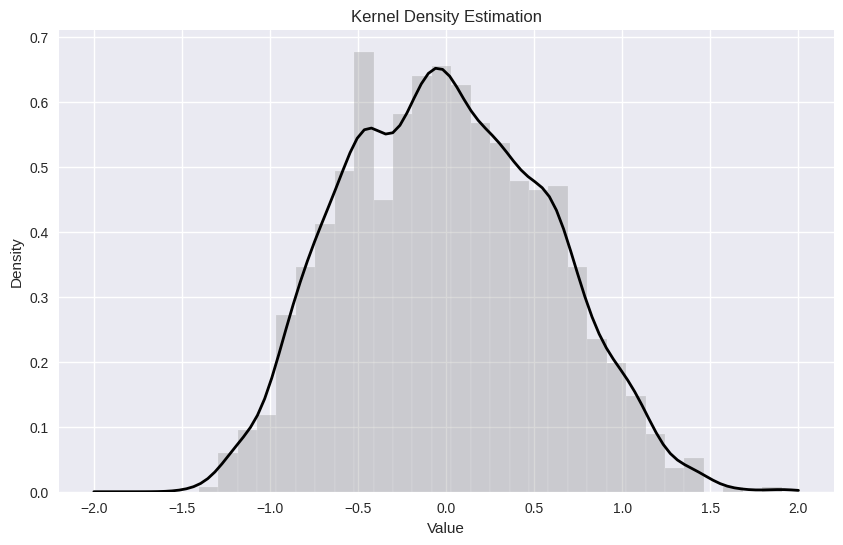

In [111]:
x_grid = np.linspace(-2, 2, 100)
log_dens = kde.score_samples(x_grid.reshape(-1, 1))

# Plot the data and the estimated density
plt.figure(figsize=(10, 6))
plt.hist(reduced_data, bins=30, density=True, alpha=0.3, color='grey')
plt.plot(x_grid, np.exp(log_dens), color='black', linewidth=2)
plt.title('Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()